In [ ]:
#from google.colab import drive
#drive.mount ('/gdrive')
#%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/MyDrive'

# **Extrcaing Libraries**

In [ ]:
import os 
os.environ['KAGGLE_USERNAME'] = "afaqahmadkhan" # username from the json file
os.environ['KAGGLE_KEY'] = "d50448bf54cb392930a6d03e9d556776" # key from the json file
!kaggle datasets download -d sobhanmoosavi/us-weather-events

import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/US_weather_events/us-weather-events.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/US_weather_events/")

# **Importing Dataset**

In [ ]:
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/US_weather_events/WeatherEvents_Jan2016-Dec2020.csv')
#data=data.head(5000)

# **Data Preprocessing**

In [ ]:
data.shape

(6274206, 13)

In [ ]:
leftover=data.loc[data['Type']!='Snow']
leftover=leftover.loc[leftover['Type']!='Cold']
leftover=leftover.loc[leftover['Type']!='Fog']
leftover=leftover.loc[leftover['Type']!='Rain']
leftover=leftover.loc[leftover['Type']!='Precipitation']
leftover=leftover.loc[leftover['Type']!='Storm']
leftover=leftover.loc[leftover['Type']!='Hail']

leftover

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


In [ ]:
a=data.loc[data['City']=='Abbeville']
a=a.loc[a['Type']=='Rain']
print(a.count())

EventId           2879
Type              2879
Severity          2879
StartTime(UTC)    2879
EndTime(UTC)      2879
TimeZone          2879
AirportCode       2879
LocationLat       2879
LocationLng       2879
City              2879
County            2879
State             2879
ZipCode           2879
dtype: int64


In [ ]:
data.isnull().sum()
data=data.fillna(data.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#table_1 = data.groupby(by=['City','Type'])
table_1 = data.groupby(by=['City','Type']).count()
print(table_1)

                          EventId  Severity  ...  State  ZipCode
City       Type                              ...                
Abbeville  Cold                27        27  ...     27       27
           Fog               1137      1137  ...   1137     1137
           Precipitation       76        76  ...     76       76
           Rain              2879      2879  ...   2879     2879
           Snow                 9         9  ...      9        9
...                           ...       ...  ...    ...      ...
Zionsville Fog                646       646  ...    646      646
           Precipitation       49        49  ...     49       49
           Rain              3045      3045  ...   3045     3045
           Snow               605       605  ...    605      605
           Storm                3         3  ...      3        3

[9847 rows x 11 columns]


In [ ]:
table_1 = table_1.reset_index()
table_1

,City,Type,EventId,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,County,State,ZipCode
0,Abbeville,Cold,27,27,27,27,27,27,27,27,27,27,27
1,Abbeville,Fog,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
2,Abbeville,Precipitation,76,76,76,76,76,76,76,76,76,76,76
3,Abbeville,Rain,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879
4,Abbeville,Snow,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,Zionsville,Fog,646,646,646,646,646,646,646,646,646,646,646
9843,Zionsville,Precipitation,49,49,49,49,49,49,49,49,49,49,49
9844,Zionsville,Rain,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045
9845,Zionsville,Snow,605,605,605,605,605,605,605,605,605,605,605


In [ ]:
table_1.iloc[[4]] 

,City,Type,EventId,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,County,State,ZipCode
4,Abbeville,Snow,9,9,9,9,9,9,9,9,9,9,9


In [ ]:
list_of_dic = []
label = table_1.City[0]
list_val = {}
sum=[];sum=0; i=5;
for index,row in table_1.iterrows():   
    sum=sum+1
    if sum==i:
      print('index: ',index)
      print('row: ',row)
      print()
    if row['City'] != label:
        label = row['City']
        if sum==i:
          print('label:',label)
        list_of_dic.append(list_val)
        if sum==i:
          print('list_of_dic: ',list_of_dic)
        list_val = {}
        list_val['City'] = row['City']
        if sum==i:
          print('list_val: ',list_val)
        list_val[row['Type']] = row['EventId']
        if sum==i:
          print('list_val: ',list_val)
    else:
        list_val['City'] = row['City']
        if sum==i:
          print('list_val: ',list_val)
        list_val[row['Type']] = row['EventId']
        if sum==i:
          print('list_val: ',list_val)

index:  4
row:  City              Abbeville
Type                   Snow
EventId                   9
Severity                  9
StartTime(UTC)            9
EndTime(UTC)              9
TimeZone                  9
AirportCode               9
LocationLat               9
LocationLng               9
County                    9
State                     9
ZipCode                   9
Name: 4, dtype: object

list_val:  {'City': 'Abbeville', 'Cold': 27, 'Fog': 1137, 'Precipitation': 76, 'Rain': 2879}
list_val:  {'City': 'Abbeville', 'Cold': 27, 'Fog': 1137, 'Precipitation': 76, 'Rain': 2879, 'Snow': 9}


In [ ]:
df = pd.DataFrame()
for dic in list_of_dic:
    df = df.append(dic, ignore_index=True)
df

,City,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,Abbeville,27.0,1137.0,76.0,2879.0,9.0,3.0,NaN
1,Aberdeen,991.0,3618.0,145.0,4768.0,779.0,40.0,NaN
2,Aberdeen Proving Ground,99.0,650.0,12.0,1735.0,84.0,1.0,6.0
3,Abilene,80.0,283.0,61.0,1314.0,69.0,18.0,4.0
4,Abingdon,10.0,394.0,48.0,3662.0,474.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1710,Yukon,54.0,959.0,64.0,1287.0,114.0,30.0,NaN
1711,Yuma,48.0,148.0,3.0,202.0,NaN,2.0,NaN
1712,Zanesville,4.0,852.0,55.0,2499.0,578.0,NaN,NaN
1713,Zapata,130.0,486.0,5.0,1409.0,7.0,NaN,NaN


In [ ]:
df=df.fillna(0)
df

,City,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,Abbeville,27.0,1137.0,76.0,2879.0,9.0,3.0,0.0
1,Aberdeen,991.0,3618.0,145.0,4768.0,779.0,40.0,0.0
2,Aberdeen Proving Ground,99.0,650.0,12.0,1735.0,84.0,1.0,6.0
3,Abilene,80.0,283.0,61.0,1314.0,69.0,18.0,4.0
4,Abingdon,10.0,394.0,48.0,3662.0,474.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1710,Yukon,54.0,959.0,64.0,1287.0,114.0,30.0,0.0
1711,Yuma,48.0,148.0,3.0,202.0,0.0,2.0,0.0
1712,Zanesville,4.0,852.0,55.0,2499.0,578.0,0.0,0.0
1713,Zapata,130.0,486.0,5.0,1409.0,7.0,0.0,0.0


In [ ]:
data = data.merge(df,on = 'City')

In [ ]:
data

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258058,W-6273796,Cold,Severe,2020-12-08 16:55:00,2020-12-08 20:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258059,W-6273797,Cold,Severe,2020-12-09 15:35:00,2020-12-09 23:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258060,W-6273798,Cold,Severe,2020-12-10 01:35:00,2020-12-10 02:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258061,W-6273799,Cold,Severe,2020-12-10 02:35:00,2020-12-10 03:55:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0


In [ ]:
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'])
data['EndTime(UTC)'] = pd.to_datetime(data['EndTime(UTC)'])

data['Start_year'] = data['StartTime(UTC)'].dt.year
data['Start_month'] = data['StartTime(UTC)'].dt.month
data['Start_week'] = data['StartTime(UTC)'].dt.week
data['Start_weekday'] = data['StartTime(UTC)'].dt.weekday
data['Start_day'] = data['StartTime(UTC)'].dt.day

data['end_year'] = data['EndTime(UTC)'].dt.year
data['end_month'] = data['EndTime(UTC)'].dt.month
data['end_week'] = data['EndTime(UTC)'].dt.week
data['end_weekday'] = data['EndTime(UTC)'].dt.weekday
data['end_day'] = data['EndTime(UTC)'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [ ]:
data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,2,6,2016,1,1,3,7
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8


In [ ]:
X = data.drop(['Type','StartTime(UTC)','EndTime(UTC)'],axis = 1)
y = data.Type

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for name in X.columns:
    if X[name].dtypes == "O":
        print(name)
        X[name] = X[name].astype(str)
        le.fit(X[name])
        X[name] = le.transform(X[name])

EventId
Severity
TimeZone
AirportCode
City
County
State


# **Splitting into Training-Training Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [ ]:
X

,EventId,Severity,TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
0,0,1,2,1,38.0972,-106.1689,1349,849,4,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,2,6,2016,1,1,3,7
1,1107950,1,2,1,38.0972,-106.1689,1349,849,4,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
2,2211343,1,2,1,38.0972,-106.1689,1349,849,4,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
3,3317144,1,2,1,38.0972,-106.1689,1349,849,4,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8
4,4427951,1,2,1,38.0972,-106.1689,1349,849,4,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258058,5841839,4,2,191,41.6000,-106.2100,1320,157,47,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0,2020,12,50,1,8,2020,12,50,1,8
6258059,5841840,4,2,191,41.6000,-106.2100,1320,157,47,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0,2020,12,50,2,9,2020,12,50,2,9
6258060,5841841,4,2,191,41.6000,-106.2100,1320,157,47,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0,2020,12,50,3,10,2020,12,50,3,10
6258061,5841842,4,2,191,41.6000,-106.2100,1320,157,47,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0,2020,12,50,3,10,2020,12,50,3,10


In [ ]:
y

0          Snow
1          Snow
2          Snow
3          Snow
4          Snow
           ... 
6258058    Cold
6258059    Cold
6258060    Cold
6258061    Cold
6258062    Cold
Name: Type, Length: 6258063, dtype: object

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6011250454565044

plotting results:

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn

cm=confusion_matrix(predicted_classes,y_test)
cm

array([[      0,       0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       0,       0,       0,       0],
       [  55212,  456380,     850,   31745, 1235642,  272160,   13172],
       [      0,       0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       0,       0,       0,       0]])

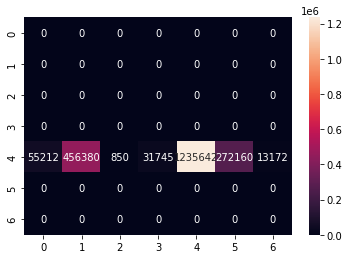

In [ ]:
seaborn.heatmap(cm,annot=True,fmt='d')